In [233]:
from google.colab import drive 
drive.mount('gdrive')


Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [234]:
#importing the packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [235]:
#Reading the data set
dataset=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/monet.csv')

#creating a new attribute called SIZE.
dataset["SIZE"]=dataset.HEIGHT*dataset.WIDTH
#dataset.to_csv('/content/gdrive/MyDrive/Colab Notebooks/monet_size.csv',index=False)

In [236]:
#dataset.columns

## **Model one** (Size VS price)

In [292]:
dataset.describe()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,0.820930,182.644186,1.611628,940.811558
std,4.311260,10.097013,10.459677,0.383857,109.091529,0.591592,676.539289
min,0.010413,3.900000,6.700000,0.000000,1.000000,1.000000,26.130000
25%,0.600153,23.125000,28.525000,1.000000,87.250000,1.000000,637.902500
50%,1.312782,25.600000,31.900000,1.000000,179.500000,2.000000,816.640000
75%,3.850000,31.450000,36.200000,1.000000,274.750000,2.000000,1036.605000
max,33.013504,78.700000,89.000000,1.000000,387.000000,3.000000,6193.690000


In [237]:
# pushing the independent value  to x (Size)
X=dataset.iloc[:,-1:] 
# pushing the dependent value  to y (price)
y=dataset.iloc[:,:1]


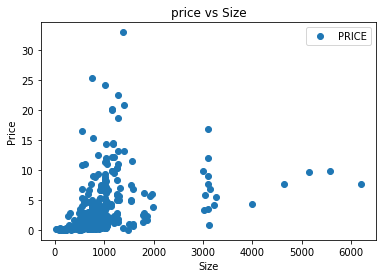

In [238]:
# visualization results before applying model
dataset.plot(x='SIZE', y='PRICE', style='o')
plt.title('price vs Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [239]:
# Determine the correaltion between the variables
data = {'size': X['SIZE'],'Price': y['PRICE']}
df = pd.DataFrame(data)
df.corr()

,size,Price
size,1.000000,0.347227
Price,0.347227,1.000000


In [240]:
#Slipting the data into training and testing 80:20 ratio
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=0)

In [241]:
X_training_size=X_training['SIZE'].values
y_training_price=y_training['PRICE'].values

X_training_size=X_training_size.reshape(-1,1)
y_training_price=y_training_price.reshape(-1,1)


In [242]:
X_testing_size=X_testing['SIZE'].values
y_testing_price=y_testing['PRICE'].values

X_testing_size=X_testing_size.reshape(-1,1)
y_testing_price=y_testing_price.reshape(-1,1)


In [243]:
# Applying Linear regression model 
model_one = LinearRegression()
model_one.fit(X_training_size, y_training_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [244]:
# To find the intercept
model_one.intercept_

array([0.86618293])

In [245]:
# To find the coefficient
model_one.coef_

array([[0.00229678]])

In [246]:
# To determine whether regression line is a best fit or not (Type: boolean)
model_one.fit_intercept

True

In [247]:
#model_one.score(X_training_size,y_training_price)

In [248]:
#Measuring the model perfomance
#model_one.score(X_testing_size,y_testing_price)


0.09654244437944359

In [ ]:
#To make predictions on the test data
#y_prediction contains all the predicted values for the input test values
y_prediction = model_one.predict(X_testing_size)
y_prediction=y_prediction.reshape(-1,1)
#y_prediction=y_prediction.flatten()
y_prediction


In [291]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_testing_price,y_prediction)
score

0.09654244437944359

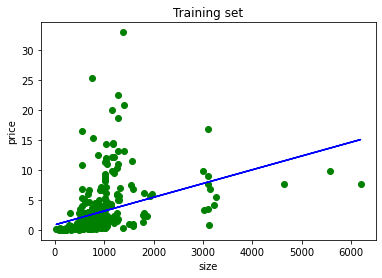

In [250]:
#Visualization for traning data
plt.scatter(X_training_size, y_training_price, color='green')
plt.plot(X_training_size, model_one.predict(X_training_size), color='blue')
plt.title('Training set')
plt.xlabel('size')
plt.ylabel('price')
plt.show()

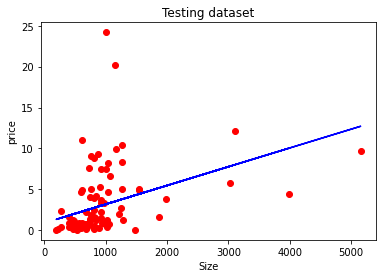

In [251]:
#Visualization for testing data
plt.scatter(X_testing_size, y_testing_price, color='red')
plt.plot(X_testing_size, model_one.predict(X_testing_size), color='blue')
plt.title('Testing dataset')
plt.xlabel('Size')
plt.ylabel('price')
plt.show()

In [252]:
## price prediction with new test (size ) values
size_new_data = np.array([75.8, 8.6, 8.1, 1.3, 6.70, 10.3])
size_new_data = size_new_data.reshape(-1, 1)
price_new_predicted = model_one.predict(size_new_data)


In [253]:
price_new_predicted=price_new_predicted.flatten()

In [254]:
new_test_data=y_testing_price[0:len(size_new_data)]
new_test_data=new_test_data.flatten()

In [255]:

size_new_data=size_new_data.reshape(-1,1)
size_new_data=size_new_data.flatten()

In [256]:
df = pd.DataFrame({'Actual': new_test_data, 'Predicted': price_new_predicted})
df

,Actual,Predicted
0,0.908000,1.040279
1,0.886000,0.885935
2,0.762774,0.884787
3,0.352000,0.869169
4,3.742500,0.881571
5,0.328067,0.889840


In [257]:
df = pd.DataFrame({'Actual_Size': size_new_data, 'Predicted_price': price_new_predicted})
df

,Actual_Size,Predicted_price
0,75.8,1.040279
1,8.6,0.885935
2,8.1,0.884787
3,1.3,0.869169
4,6.7,0.881571
5,10.3,0.889840


In [258]:
X_testing_size=X_testing_size.flatten()
y_testing_price=y_testing_price.flatten()
y_prediction=y_prediction.flatten()

In [259]:
# To compare the actual output values of X_testing_size with the predicted values
df = pd.DataFrame({'Actual': y_testing_price, 'Predicted': y_prediction})
df

,Actual,Predicted
0,0.908000,3.182809
1,0.886000,1.789030
2,0.762774,3.146428
3,0.352000,1.942730
4,3.742500,3.006416
...,...,...
81,1.390620,2.573611
82,0.288500,2.250453
83,1.487500,2.755056
84,7.539658,3.001823


In [260]:
#Evaluating the model
print('Mean absolute Error',metrics.mean_absolute_error(y_testing_price, y_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_testing_price, y_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testing_price, y_prediction)))# R sqaure
#r2_score(new_test_data,price_new_predicted)

Mean absolute Error 2.6855486941004547
Mean Squared Error: 16.35922009540488
Root Mean Squared Error: 4.044653272581579


# **Multivarient Model**

In [261]:
dataset.columns

Index(['PRICE', 'HEIGHT', 'WIDTH', 'SIGNED', 'PICTURE', 'HOUSE ', 'SIZE'], dtype='object')

In [262]:
#Segregation of independent and dependent values
X=dataset[['HEIGHT', 'WIDTH', 'SIGNED','PICTURE', 'SIZE', 'HOUSE ']]
y=dataset['PRICE']

In [263]:
#Slipting the data into training and testing 80:20 ratio
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [264]:
# Applying Linear regression model 
multi_varient_model = LinearRegression()
multi_varient_model.fit(X_multi_train, y_multi_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [289]:
# To find the intercept
multi_varient_model.intercept_

-7.724213898054689

In [ ]:
#To find the coefficients for all the attributes
coeff_df = pd.DataFrame(multi_varient_model.coef_, X.columns, columns=['Coefficient'])
coeff_df

In [290]:
multi_varient_model.coef_

array([ 1.07032341e-01,  1.76735056e-01,  1.96225611e+00,  3.67750940e-03,
       -1.07555132e-03,  5.29873805e-01])

In [268]:
# To determine whether regression line is a best fit or not (Type: boolean)
multi_varient_model.fit_intercept

True

In [ ]:
#to make the predictions on the test data
y_pred = multi_varient_model.predict(X_multi_test)
y_pred

In [ ]:
#To compare the actual output values for X_multi_test with the predicted values
df = pd.DataFrame({'Actual': y_multi_test, 'Predicted': y_pred})
df

In [271]:
#Evaluating the model
print("Mean Abs error",metrics.mean_absolute_error(y_multi_test,y_pred))
print("Mean Squared error",metrics.mean_squared_error(y_multi_test,y_pred))
print("Root mean squared error",np.sqrt(metrics.mean_squared_error(y_multi_test,y_pred)))


Mean Abs error 2.5506852722047557
Mean Squared error 15.354085812007373
Root mean squared error 3.9184289979540745


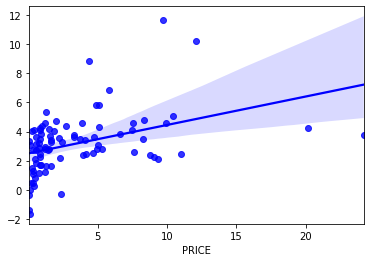

In [272]:
#visulaization for multi linear regression 
sns.regplot(x=y_multi_test,y=y_pred,color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


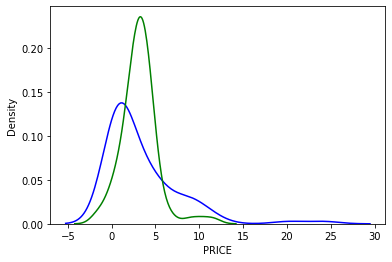

In [273]:
ax1=sns.distplot(y_multi_test, hist=False, color='blue',label='Actual')
sns.distplot(y_pred,hist=False,color='green',label="Fitted",ax=ax1)

## **Second** **model** (Height Vs price)

In [274]:
#setting independent variable as height (X_height)
X_height=dataset.iloc[:, 1:2]

In [275]:
#setting dependent value as price(y_price)
y_price=dataset.iloc[:,:1]

In [ ]:
#Slipting the data into training and testing 80:20 ratio
X_train_model_two, X_test_model_two, y_train_model_two, y_test_model_two = train_test_split(X_height, y_price, test_size=0.2, random_state=0)
X_test_model_two

In [277]:
## Determine the correaltion between the variables
data = {'size': X_height['HEIGHT'],'Price': y_price['PRICE']}
df = pd.DataFrame(data)
df.corr()

,size,Price
size,1.000000,0.314581
Price,0.314581,1.000000


In [278]:
# Applying Linear regression model 
model_second = LinearRegression()
model_second.fit(X_train_model_two, y_train_model_two)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [279]:
model_second.intercept_

array([-0.27687085])

In [280]:
#To make predictions on the test data
#y_prediction contains all the predicted values for the input test values
y_pred_model_two = model_second.predict(X_test_model_two)
y_pred_model_two=y_pred_model_two.flatten()

In [281]:
X_testing_height=X_test_model_two['HEIGHT'].values
y_testing_price=y_test_model_two['PRICE'].values

X_testing_height=X_testing_height.reshape(-1,1)
y_testing_price=y_testing_price.reshape(-1,1)

In [282]:
#model_second.score(X_train_model_two,y_train_model_two)
model_second.score(X_testing_height,y_testing_price)

0.14944028545343757

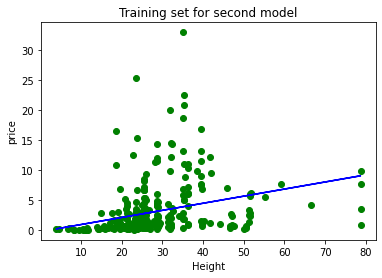

In [283]:
#Visualization for Second Model traning data
plt.scatter(X_train_model_two, y_train_model_two, color='green')
plt.plot(X_train_model_two, model_second.predict(X_train_model_two), color='blue')
plt.title('Training set for second model')
plt.xlabel('Height')
plt.ylabel('price')
plt.show()

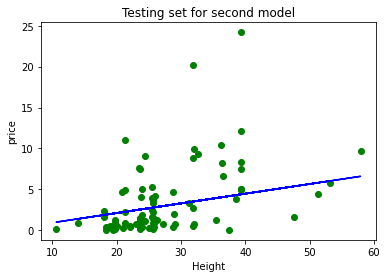

In [284]:
#Visualization for Second Model testing data
plt.scatter(X_test_model_two, y_test_model_two, color='green')
plt.plot(X_test_model_two, model_second.predict(X_test_model_two), color='blue')
plt.title('Testing set for second model')
plt.xlabel('Height')
plt.ylabel('price')
plt.show()

In [285]:
## price prediction with new test (Height ) values 
height_new = np.array([65.6, 1.4, 78.8, 12.4, 56.7, 6])
height_new = height_new.reshape(-1, 1)
price_predicted = model_second.predict(height_new)

In [286]:
y_test_model_two=y_test_model_two.PRICE.values
y_test_model_two

array([ 0.908   ,  0.886   ,  0.762774,  0.352   ,  3.7425  ,  0.328067,
        0.028022,  0.13148 ,  0.052172,  9.6825  ,  4.18    ,  5.0625  ,
        8.36575 ,  0.245183,  0.535074,  1.974181,  3.3     ,  7.6     ,
        2.2025  , 20.1675  ,  1.29116 ,  0.941   ,  1.155   ,  8.8     ,
        0.7975  ,  0.099   ,  1.2125  ,  0.359547,  1.65    ,  2.72387 ,
        0.7725  ,  8.25    ,  0.790229,  3.3025  ,  1.6525  , 12.1     ,
        2.42575 ,  6.630157,  4.4     ,  1.27605 ,  0.825   ,  4.076   ,
        7.4726  ,  1.656   ,  9.35    ,  0.11    ,  3.9625  ,  5.7775  ,
        0.253   ,  4.95419 ,  5.0625  ,  0.440718,  5.2825  , 11.      ,
        0.819577,  1.87    ,  4.902943,  0.825   ,  4.7115  ,  0.19857 ,
        1.45918 ,  0.33    , 24.20575 , 10.424   ,  0.399166,  0.792   ,
        1.17073 ,  1.2125  ,  1.5425  ,  5.01809 ,  0.5525  ,  0.516516,
        0.539   ,  2.2475  ,  4.63008 ,  0.472854,  3.85    ,  2.31575 ,
        9.0225  ,  0.736201,  0.035549,  1.39062 , 

In [287]:
#To compare the actual output values for X_test_model_two with the predicted values
df = pd.DataFrame({'Actual': y_test_model_two, 'Predicted': y_pred_model_two})
df

,Actual,Predicted
0,0.908000,2.755661
1,0.886000,1.381545
2,0.762774,2.945194
3,0.352000,1.961990
4,3.742500,2.755661
...,...,...
81,1.390620,2.518744
82,0.288500,2.210753
83,1.487500,2.767507
84,7.539658,2.518744


In [288]:
#Evaluating the model
print('MSE',metrics.mean_absolute_error(y_test_model_two, y_pred_model_two))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_model_two, y_pred_model_two))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_model_two, y_pred_model_two)))# R sqaure

MSE 2.563036369931283
Mean Squared Error: 15.401380494288452
Root Mean Squared Error: 3.924459261387287
